### LOGISTIC REGRESSION

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn. metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv('bank_data.csv')
df

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,0,...,0,0,0,0,0,0,1,0,0,1
45207,71,0,1729,0,0,456,2,-1,0,0,...,0,0,1,0,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,5,184,3,0,...,0,0,1,0,0,0,0,0,0,1
45209,57,0,668,0,0,508,4,-1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,258.163080,2.763841,40.197828,0.580323,0.108403,...,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,0.028820,0.006370,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,257.527812,3.098021,100.128746,2.303441,0.310892,...,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,0.167303,0.079559,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.shape

(45211, 32)

In [5]:
df.isnull().sum()

age                0
default            0
balance            0
housing            0
loan               0
duration           0
campaign           0
pdays              0
previous           0
poutfailure        0
poutother          0
poutsuccess        0
poutunknown        0
con_cellular       0
con_telephone      0
con_unknown        0
divorced           0
married            0
single             0
joadmin.           0
joblue.collar      0
joentrepreneur     0
johousemaid        0
jomanagement       0
joretired          0
joself.employed    0
joservices         0
jostudent          0
jotechnician       0
jounemployed       0
jounknown          0
y                  0
dtype: int64

In [6]:
df.shape

(45211, 32)

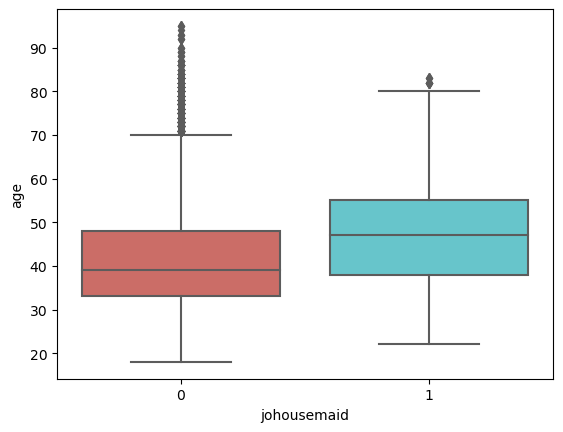

In [7]:
sns.boxplot(x='johousemaid',y='age',data=df,palette='hls')
plt.show()

<AxesSubplot:xlabel='johousemaid', ylabel='count'>

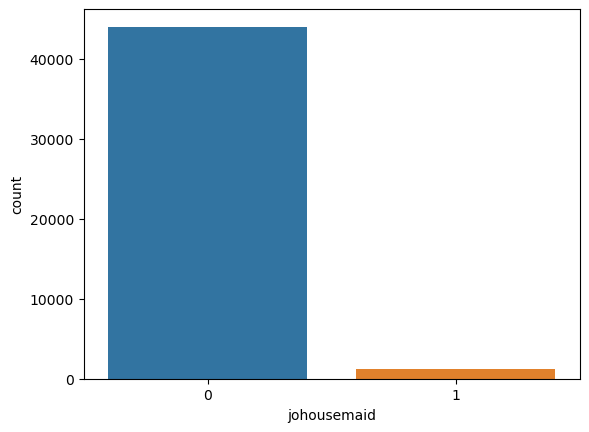

In [8]:
sns.countplot(x='johousemaid',data=df)

<AxesSubplot:xlabel='joentrepreneur', ylabel='count'>

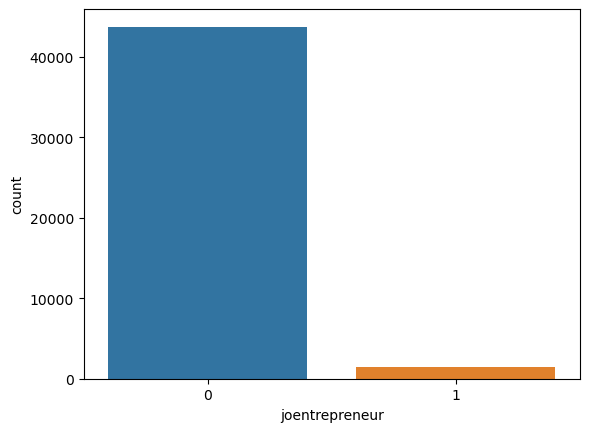

In [9]:
sns.countplot(x='joentrepreneur',data=df)

<AxesSubplot:xlabel='joretired', ylabel='count'>

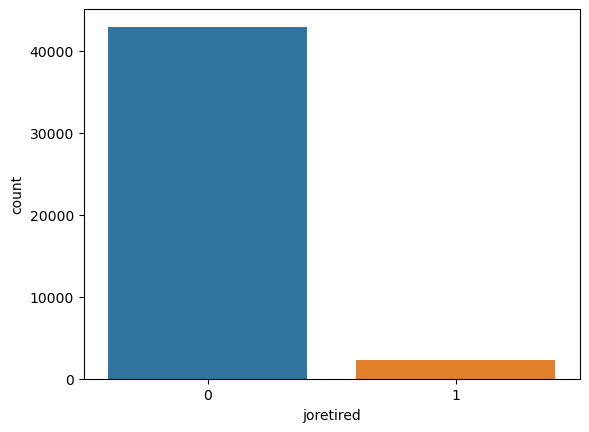

In [10]:
sns.countplot(x='joretired',data=df)

<AxesSubplot:xlabel='joblue.collar', ylabel='count'>

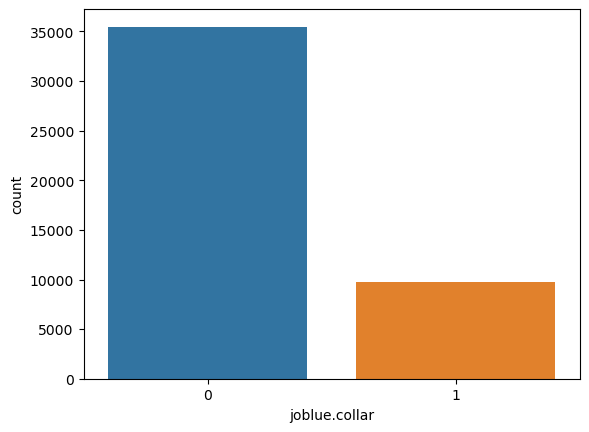

In [11]:
sns.countplot(x='joblue.collar',data=df)


<AxesSubplot:xlabel='joadmin.', ylabel='count'>

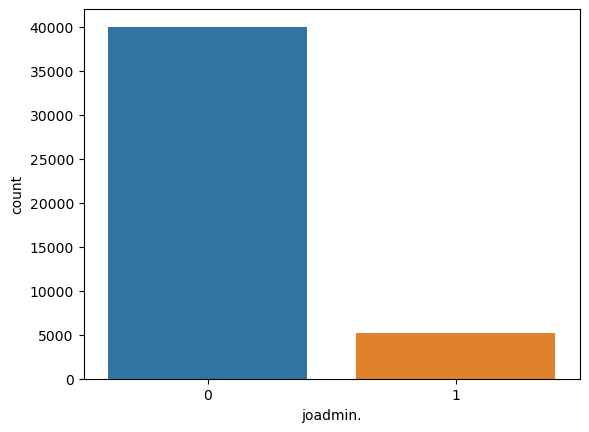

In [12]:
sns.countplot(x='joadmin.',data=df)

<AxesSubplot:xlabel='joself.employed', ylabel='count'>

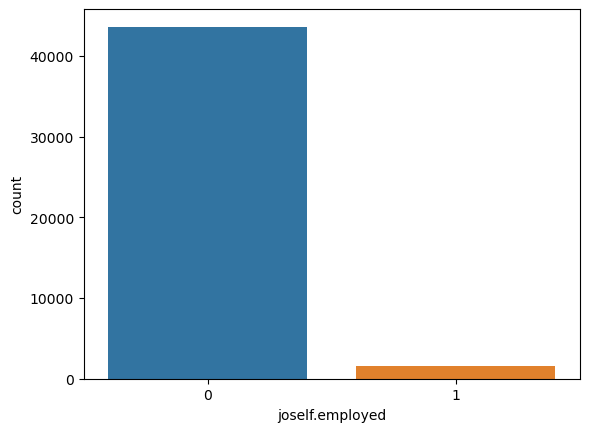

In [13]:
sns.countplot(x='joself.employed',data=df)

<AxesSubplot:xlabel='joservices', ylabel='count'>

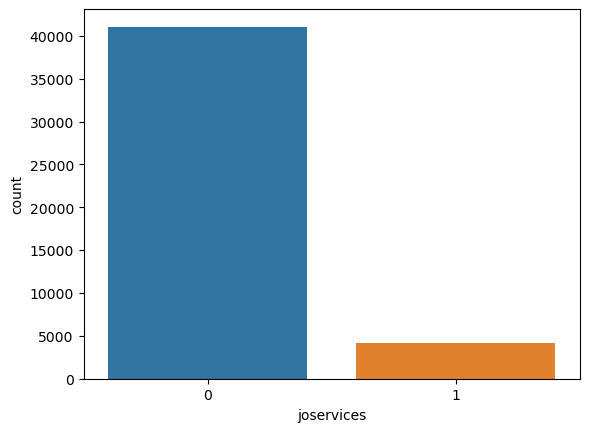

In [14]:
sns.countplot(x='joservices',data=df)

<AxesSubplot:xlabel='jostudent', ylabel='count'>

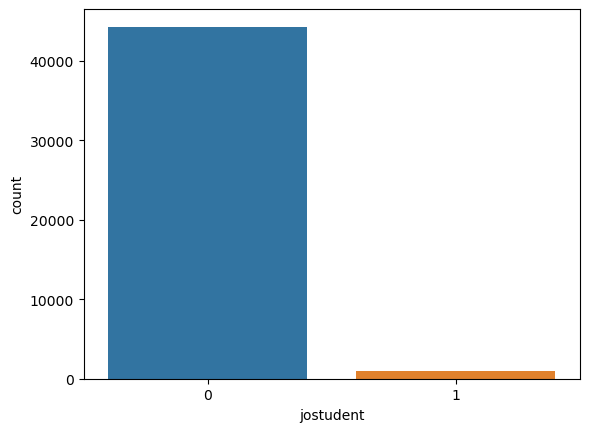

In [15]:
sns.countplot(x='jostudent',data=df)

<AxesSubplot:xlabel='jotechnician', ylabel='count'>

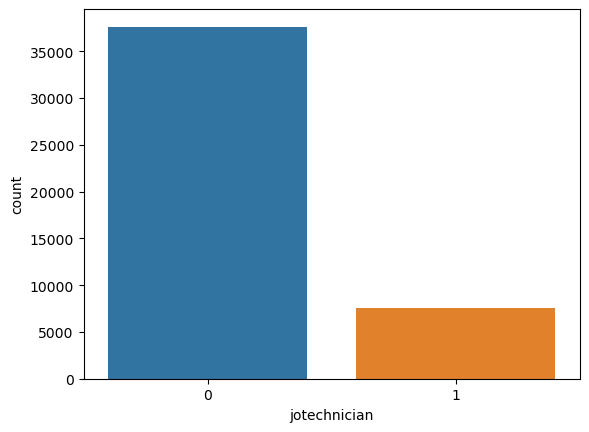

In [16]:
sns.countplot(x='jotechnician',data=df)

<AxesSubplot:xlabel='jounemployed', ylabel='count'>

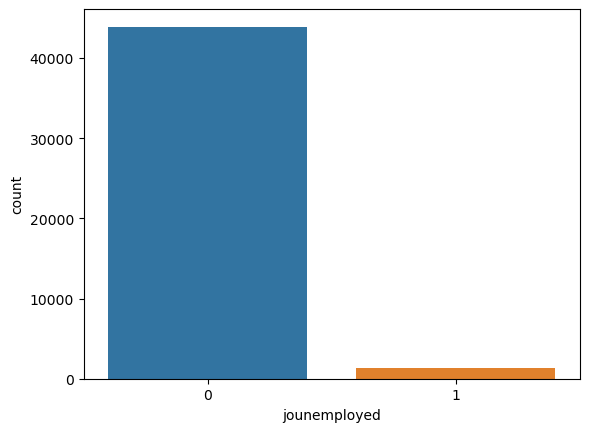

In [17]:
sns.countplot(x='jounemployed',data=df)

<AxesSubplot:xlabel='jounknown', ylabel='count'>

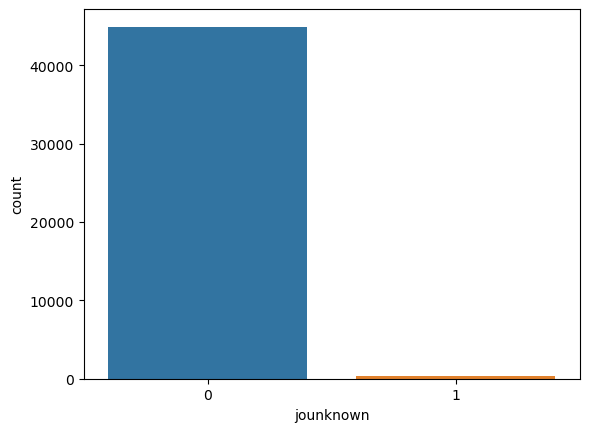

In [18]:
sns.countplot(x='jounknown',data=df)

<AxesSubplot:xlabel='divorced', ylabel='count'>

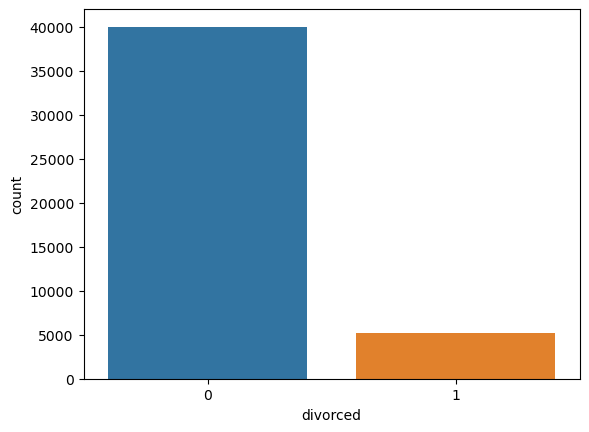

In [19]:
sns.countplot(x='divorced',data=df)

<AxesSubplot:xlabel='married', ylabel='count'>

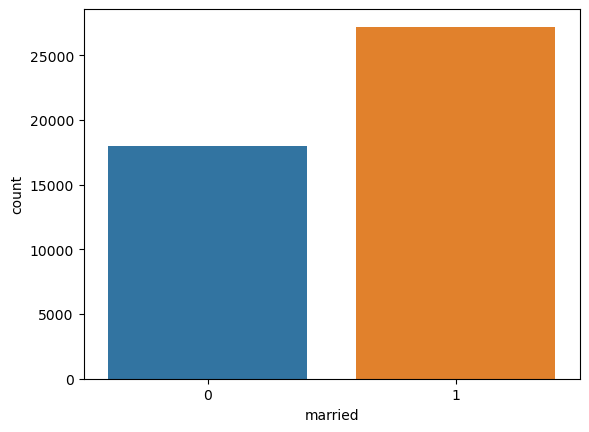

In [20]:
sns.countplot(x='married',data=df)

<AxesSubplot:xlabel='single', ylabel='count'>

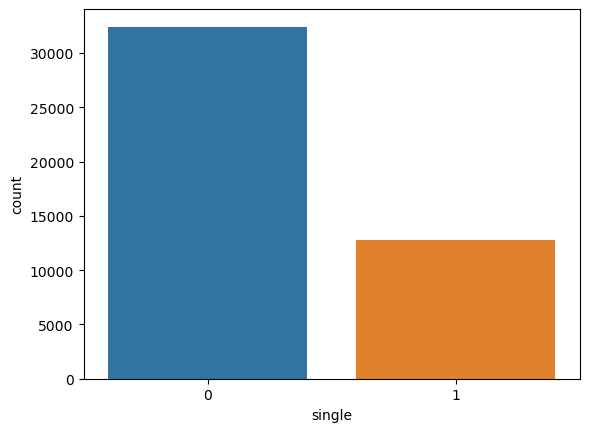

In [21]:
sns.countplot(x='single',data=df)

In [22]:
df

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,0,...,0,0,0,0,0,0,1,0,0,1
45207,71,0,1729,0,0,456,2,-1,0,0,...,0,0,1,0,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,5,184,3,0,...,0,0,1,0,0,0,0,0,0,1
45209,57,0,668,0,0,508,4,-1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
pd.set_option('display.max_columns', None)
df

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,poutother,poutsuccess,poutunknown,con_cellular,con_telephone,con_unknown,divorced,married,single,joadmin.,joblue.collar,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
45207,71,0,1729,0,0,456,2,-1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,5,184,3,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
45209,57,0,668,0,0,508,4,-1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [24]:
pd.crosstab(df.married,df.jotechnician)

jotechnician,0,1
married,,
0,14452,3545
1,23162,4052


<AxesSubplot:xlabel='con_cellular'>

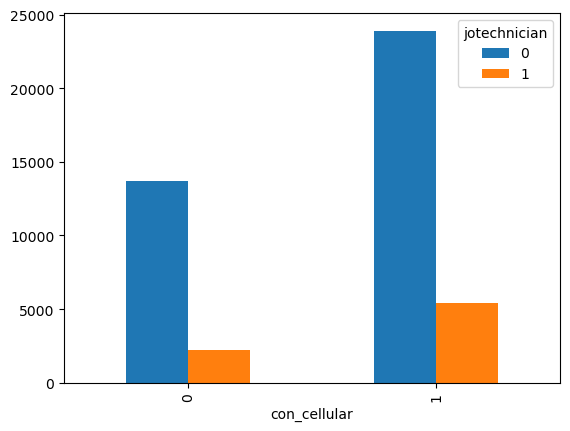

In [25]:
pd.crosstab(df.con_cellular,df.jotechnician).plot(kind='bar')

### MODEL BUILDING

In [26]:
from sklearn.linear_model import LogisticRegression
df.shape

(45211, 32)

In [27]:
import warnings
warnings.filterwarnings('ignore')
x=df.iloc[:,0:31]
y=df.iloc[:,31]
classifier=LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [28]:
classifier.coef_
#coefficients of the features

array([[-1.78089319e-02, -2.81015733e-02,  2.38144957e-05,
        -1.01060983e+00, -2.83821642e-01,  3.81380004e-03,
        -3.30662868e-01,  2.61763082e-03, -2.25749293e-01,
        -1.91435092e-01, -4.76002141e-02,  4.35998664e-01,
        -6.62197730e-01,  8.90739626e-02,  7.58146573e-02,
        -6.30122992e-01,  2.64783786e-02, -2.44110456e-01,
        -2.47602294e-01, -5.65145628e-02, -3.76882830e-01,
        -3.68443936e-02, -9.59761876e-03,  1.32150853e-02,
         2.47110322e-01, -2.43626774e-02, -1.40145467e-01,
         3.04363581e-02, -1.20745859e-01,  4.25370932e-03,
         4.84356168e-03]])

In [29]:
classifier.predict_proba(x)

array([[0.96507041, 0.03492959],
       [0.97532202, 0.02467798],
       [0.98136795, 0.01863205],
       ...,
       [0.20328545, 0.79671455],
       [0.88692554, 0.11307446],
       [0.92881376, 0.07118624]])

In [30]:
y_pred=classifier.predict(x)
df['y_pred']=y_pred
df

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,poutother,poutsuccess,poutunknown,con_cellular,con_telephone,con_unknown,divorced,married,single,joadmin.,joblue.collar,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y,y_pred
0,58,0,2143,1,0,261,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
45207,71,0,1729,0,0,456,2,-1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
45208,72,0,5715,0,0,1127,5,184,3,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
45209,57,0,668,0,0,508,4,-1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
df

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,poutother,poutsuccess,poutunknown,con_cellular,con_telephone,con_unknown,divorced,married,single,joadmin.,joblue.collar,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y,y_pred
0,58,0,2143,1,0,261,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
45207,71,0,1729,0,0,456,2,-1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
45208,72,0,5715,0,0,1127,5,184,3,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
45209,57,0,668,0,0,508,4,-1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
y_prob=pd.DataFrame(classifier.predict_proba(x.iloc[:,:]))
new_df=pd.concat([df,y_prob],axis=1)
new_df

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,poutother,poutsuccess,poutunknown,con_cellular,con_telephone,con_unknown,divorced,married,single,joadmin.,joblue.collar,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y,y_pred,0,1
0,58,0,2143,1,0,261,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.965070,0.034930
1,44,0,29,1,0,151,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.975322,0.024678
2,33,0,2,1,1,76,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.981368,0.018632
3,47,0,1506,1,0,92,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.984824,0.015176
4,33,0,1,0,0,198,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.897171,0.102829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0.391834,0.608166
45207,71,0,1729,0,0,456,2,-1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.713598,0.286402
45208,72,0,5715,0,0,1127,5,184,3,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.203285,0.796715
45209,57,0,668,0,0,508,4,-1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.886926,0.113074


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y,y_pred)
confusion_matrix

array([[39166,   756],
       [ 4112,  1177]], dtype=int64)

In [35]:
pd.crosstab(y_pred,y)

y,0,1
row_0,,
0,39166,4112
1,756,1177


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.61      0.22      0.33      5289

    accuracy                           0.89     45211
   macro avg       0.76      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211

